# Sao Paulo house prices

## Load data frame

In [47]:
import numpy as np
import pandas as pd

In [48]:
#Load csv file from github with house price data of Sao Paulo
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
df = pd.read_csv(url)

In [49]:
#Save the csv data in the raw data directory
df.to_csv('../data/raw/SP_house_prices_raw.csv', index = False)

In [50]:
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [51]:
#Number of rows in the dataframe
df.shape[0]

10008

In [52]:
#Verify data type of each colummn
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


## Transform 'Valor' type to a numeric type

Note the column with the value of the house ('Valor') is not a number type.

In [53]:
#Remove the currency sign in the front of the values in 'Valor column
df['Valor'] = df['Valor'].str.replace('R$ ', '', regex = False)

In [54]:
#Verify 'Valor' column
df['Valor'].head()

0    7.000.000
1    3.700.000
2      380.000
3      685.000
4      540.000
Name: Valor, dtype: object

In [55]:
#Remove dots ('.') in values in 'Valor' column
#Note that the decimal separador would be ','
df['Valor'] = df['Valor'].str.replace('.', '', regex = False)

In [56]:
df['Valor'].head()

0    7000000
1    3700000
2     380000
3     685000
4     540000
Name: Valor, dtype: object

In [57]:
#There is an invalid entry in row 151
df.iloc[151,:]

Rua                       Rua Fonseca da Costa
Bairro                         Bosque da Saúde
Cidade                               São Paulo
Metragem                                   650
Quartos                                      4
Banheiros                                    6
Vagas                                       12
Valor        11000\n                      /Mês
Name: 151, dtype: object

In [58]:
#Change tha value in row 151 manually
df.at[151, 'Valor'] = '11000'

In [59]:
#Verify row 151
df.iloc[151,:]

Rua          Rua Fonseca da Costa
Bairro            Bosque da Saúde
Cidade                  São Paulo
Metragem                      650
Quartos                         4
Banheiros                       6
Vagas                          12
Valor                       11000
Name: 151, dtype: object

In [60]:
#Row 156 has the same problem
df['Valor'][156]

'12000\n                      /Mês'

In [61]:
#Correct all values that has this same problem
df['Valor'] = df['Valor'].str.replace('\n                      /Mês', '', regex = False)

In [62]:
#Verify row 156
df['Valor'][156]

'12000'

In [63]:
#Another problem in row 6029
df['Valor'][6029]

'2600\n                      /Ano'

In [64]:
#Correct all values that has this same problem
df['Valor'] = df['Valor'].str.replace('\n                      /Ano', '', regex = False)

In [65]:
#Verify row 6029
df['Valor'][6029]

'2600'

In [66]:
#Row 6639 has an analogous problem
df['Valor'][6639]

'15000\n                      /Dia'

In [67]:
#Correct all values that has this same problem
df['Valor'] = df['Valor'].str.replace('\n                      /Dia', '', regex = False)

In [68]:
#Convert 'Valor' column to a numeric type
df['Valor'] = pd.to_numeric(df['Valor'])

In [69]:
df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 625.6+ KB


'Valor' has now a numeric type!

## Verify null values

In [71]:
df.isnull().sum()

Rua          3434
Bairro         12
Cidade          0
Metragem        0
Quartos         0
Banheiros       0
Vagas           0
Valor           0
dtype: int64

**There as 3434 null street names ('Rua') and 12 null district names ('Bairro').**

## Save the DataFrame with corrections made

In [72]:
df.to_csv('../data/interim/Data_Day1.csv', index = False)

## Basic info

In [73]:
#Number of different unique district ('Bairro') names
df['Bairro'].nunique()

701

**There are 701 different district names**

In [74]:
#Verify if all rows belong to São Paulo
df['Cidade'].nunique()

1

**There is only one value for city, as expected**

## Tasks

### 1 - Find mean footage for each district

Footage is in 'Metragem' column, and district is in 'Bairro' column

In [75]:
#Get Dataframe with footage separated by district
dfDistricts = df.groupby(['Bairro'])['Metragem']

In [76]:
#Get mean footage for each district
DistrictMeans = dfDistricts.mean()
DistrictMeans

Bairro
Aclimação            253.056818
Alto da Boa Vista    418.875000
Alto da Lapa         294.337209
Alto da Mooca        270.050000
Alto de Pinheiros    433.444988
                        ...    
Vila Água Funda      152.200000
Água Branca          191.000000
Água Fria            165.416667
Água Funda           139.000000
Água Rasa            340.250000
Name: Metragem, Length: 701, dtype: float64

In [77]:
#Sort values in descending order
DistrictMeans.sort_values(ascending = False, inplace = True)

In [78]:
#Verify
DistrictMeans

Bairro
Sítio Represa                         37000.000000
Vila Castelo                           2850.000000
Jardim Guedala                         2486.640199
Jardim das Camélias                    1700.000000
Chácara Flora                          1260.727273
                                          ...     
Cidade Antônio Estevão de Carvalho       57.500000
Jardim Nova Germania                     57.000000
Jardim Benfica                           48.000000
Vila Leonor                              46.000000
Vila Guaca                               10.000000
Name: Metragem, Length: 701, dtype: float64

<AxesSubplot:xlabel='Bairro'>

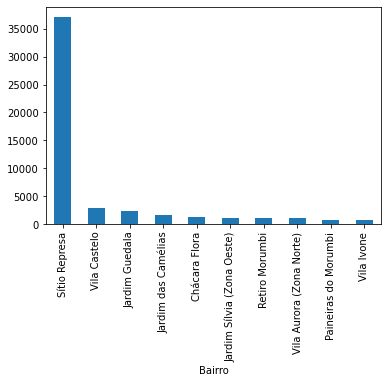

In [79]:
#Make bar plot with the 10 greatest mean footages
DistrictMeans[0:10].plot.bar()

### 2 - Select data by districts with two different methods

**First method is the same as used in the previous question**

In [80]:
dfDistricts_Method1 = df.groupby(['Bairro'])

**Second method will use a loop to iterate the district names**

In [81]:
#Get district names
District_Names = df['Bairro'].unique()

In [82]:
District_Names

array(['Planalto Paulista', 'Jardim dos Estados', 'Jardim Reimberg',
       'Jardim Morumbi', 'Mooca', 'Santo Amaro', 'Cidade Mãe do Céu',
       'Jardim Vergueiro', 'Jardim Benfica', 'Vila Alpina',
       'Vila Monumento', 'Jardim Luzitânia', 'Vila Uberabinha',
       'Jardim Prudência', 'Lauzane Paulista', 'Jardim Santa Maria',
       'Vila Nova', 'Itaberaba', 'Vila Nova Conceição', 'Jardim da Saúde',
       'Jardim Santo Antônio', 'Vila Mazzei', 'Vila Madalena',
       'Jardim Ivana', 'Vila Campo Grande', 'Vila Gomes Cardim',
       'Bela Aliança', 'Vila Albertina', 'Cidade Jardim',
       'Parque da Lapa', 'Vila Libanesa', 'Cidade Domitila',
       'Vila Nova Savoia', 'Jardim Maria Estela', 'Parque São Rafael',
       'Vila Bandeirantes', 'Parque Colonial', 'Vila Califórnia',
       'Jardim das Imbuias', 'Vila Tramontano', 'Vila Nancy',
       'Parada Inglesa', 'Jardim Leonor Mendes de Barros', 'Jardim Iva',
       'Jardim Amália', 'Vila dos Remédios', 'Brooklin Paulista',
       '

In [83]:
#Iterate district_names
for district  in District_Names:
    dfDistricts_Method2 = df[df['Bairro'] == district]

Then, inside the loop, we can perform some desired operation with the data of a specific district

### 3 - Explore the other columns using different kinds of graphs

array([[<AxesSubplot:title={'center':'Quartos'}>,
        <AxesSubplot:title={'center':'Banheiros'}>],
       [<AxesSubplot:title={'center':'Vagas'}>, <AxesSubplot:>]],
      dtype=object)

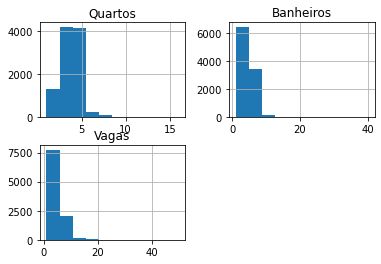

In [84]:
#Plot histogram with number of rooms, bathrooms and parking spaces.
df.loc[:,['Quartos', 'Banheiros', 'Vagas']].hist()

In [85]:
#Get statistical data relating number of rooms, bathrooms and parking spaces.
df.loc[:,['Quartos', 'Banheiros', 'Vagas']].describe()

,Quartos,Banheiros,Vagas
count,10008.000000,10008.000000,10008.000000
mean,3.483114,3.879097,4.097222
std,1.064200,1.988467,2.824014
min,1.000000,1.000000,1.000000
25%,3.000000,2.000000,2.000000
50%,3.000000,4.000000,4.000000
75%,4.000000,5.000000,5.000000
max,16.000000,40.000000,50.000000


**The maximum values for each colummn is much greater than the mean and median. We will cut this outliers to make better histograms.**

<AxesSubplot:>

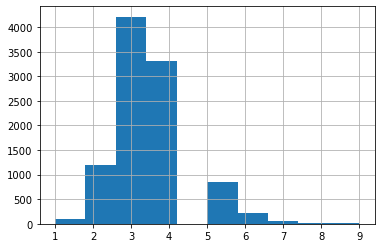

In [86]:
#Consider only rows with numbers of rooms lower than 10.
df[df['Quartos'] < 10]['Quartos'].hist()

<AxesSubplot:>

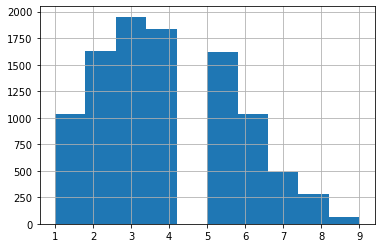

In [87]:
#Consider only rows with numbers of bathrooms lower than 10.
df[df['Banheiros'] < 10]['Banheiros'].hist()

<AxesSubplot:>

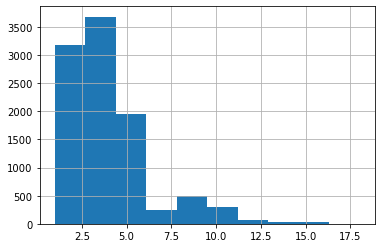

In [88]:
#Consider only rows with numbers of rooms lower than 20.
df[df['Vagas'] < 20]['Vagas'].hist()

### 4 - Get other statistical data

In [89]:
#Statistical data about footages, rooms, bathrooms, parking spaces and house price
df.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor
count,10008.000000,10008.000000,10008.000000,10008.000000,1.000800e+04
mean,442.300659,3.483114,3.879097,4.097222,2.794170e+06
std,7515.379389,1.064200,1.988467,2.824014,3.866249e+06
min,10.000000,1.000000,1.000000,1.000000,1.650000e+03
25%,173.000000,3.000000,2.000000,2.000000,7.500000e+05
50%,290.000000,3.000000,4.000000,4.000000,1.600000e+06
75%,460.250000,4.000000,5.000000,5.000000,3.350000e+06
max,750000.000000,16.000000,40.000000,50.000000,6.500000e+07


In [90]:
#Get statistical data grouped by districts
df.groupby(['Bairro']).describe()

Metragem                                                \
                     count        mean         std    min     25%    50%   
Bairro                                                                     
Aclimação             88.0  253.056818  159.140245  104.0  165.00  227.5   
Alto da Boa Vista      8.0  418.875000  111.880596  315.0  347.50  378.0   
Alto da Lapa          86.0  294.337209  187.674036   46.0  151.25  255.0   
Alto da Mooca         20.0  270.050000  237.306924   84.0  133.75  182.5   
Alto de Pinheiros    409.0  433.444988  145.676574  100.0  344.00  412.0   
...                    ...         ...         ...    ...     ...    ...   
Vila Água Funda        5.0  152.200000   44.353128   90.0  138.00  143.0   
Água Branca           13.0  191.000000   91.045776   91.0  143.00  174.0   
Água Fria             12.0  165.416667   82.934211   60.0   76.25  174.5   
Água Funda             2.0  139.000000   19.798990  125.0  132.00  139.0   
Água Rasa              8.0  340.250000  294.046036   86.0  172.50  180.0   

                                  Quartos            ... Vagas        Valor  \
                      75%     max   count      mean  ...   75%   max  count   
Bairro                                               ...                      
Aclimação          300.00  1500.0    88.0  3.318182  ...  4.00   8.0   88.0   
Alto da Boa Vista  448.75   595.0     8.0  4.125000  ...  5.25   7.0    8.0   
Alto da Lapa       363.75  1133.0    86.0  3.151163  ...  5.75  12.0   86.0   
Alto da Mooca      221.25   805.0    20.0  3.300000  ...  5.25   6.0   20.0   
Alto de Pinheiros  505.00  1530.0   409.0  3.938875  ...  6.00  15.0  409.0   
...                   ...     ...     ...       ...  ...   ...   ...    ...   
Vila Água Funda    190.00   200.0     5.0  2.600000  ...  3.00   4.0    5.0   
Água Branca        200.00   400.0    13.0  3.153846  ...  3.00   7.0   13.0   
Água Fria          210.50   314.0    12.0  2.833333  ...  2.25   5.0   12.0   
Água Funda         146.00   153.0     2.0  3.000000  ...  2.00   2.0    2.0   
Água Rasa          455.75   805.0     8.0  3.500000  ...  5.50  10.0    8.0   

                                                                     \
                           mean           std        min        25%   
Bairro                                                                
Aclimação          1.583697e+06  9.874291e+05     7000.0   957500.0   
Alto da Boa Vista  2.391250e+06  5.535970e+05  1680000.0  2087500.0   
Alto da Lapa       1.938418e+06  1.469504e+06     2790.0  1200000.0   
Alto da Mooca      1.184170e+06  4.474662e+05   530000.0   757500.0   
Alto de Pinheiros  4.317024e+06  2.691630e+06     7000.0  3000000.0   
...                         ...           ...        ...        ...   
Vila Água Funda    6.520000e+05  2.064461e+05   370000.0   540000.0   
Água Branca        1.132654e+06  5.568425e+05     6500.0  1099000.0   
Água Fria          9.270833e+05  4.193526e+05   395000.0   395000.0   
Água Funda         5.450000e+05  1.626346e+05   430000.0   487500.0   
Água Rasa          5.408750e+05  3.290512e+05    15000.0   472500.0   

                                                     
                         50%        75%         max  
Bairro                                               
Aclimação          1391500.0  2200000.0   5000000.0  
Alto da Boa Vista  2275000.0  2812500.0   3200000.0  
Alto da Lapa       1700000.0  2350000.0   9000000.0  
Alto da Mooca      1222500.0  1600000.0   2000000.0  
Alto de Pinheiros  3900000.0  5500000.0  18000000.0  
...                      ...        ...         ...  
Vila Água Funda     650000.0   850000.0    850000.0  
Água Branca        1200000.0  1300000.0   2500000.0  
Água Fria          1197500.0  1275000.0   1300000.0  
Água Funda          545000.0   602500.0    660000.0  
Água Rasa           696000.0   745000.0    790000.0  

[701 rows x 40 columns]

### 5 - Which districts have null street names ?

In [91]:
#Use the second method of selecting data by districts
Count = 0
for district  in District_Names:
    dfDistrictsStreets = df[df['Bairro'] == district]['Rua']
    N_null = dfDistrictsStreets.isnull().sum()
    if N_null > 0:
        #print only the districts that have null values
        print(district, N_null)
        Count += 1
    

Planalto Paulista 37
Jardim dos Estados 15
Jardim Morumbi 24
Mooca 14
Santo Amaro 66
Cidade Mãe do Céu 1
Vila Alpina 2
Vila Monumento 13
Jardim Luzitânia 31
Jardim Prudência 15
Lauzane Paulista 4
Jardim Santa Maria 2
Itaberaba 1
Vila Nova Conceição 30
Jardim da Saúde 14
Vila Mazzei 4
Vila Madalena 83
Vila Campo Grande 7
Vila Gomes Cardim 4
Bela Aliança 3
Vila Albertina 3
Cidade Jardim 115
Parque da Lapa 2
Cidade Domitila 2
Jardim Maria Estela 2
Parque São Rafael 2
Parque Colonial 3
Vila Califórnia 2
Vila Tramontano 26
Jardim Leonor Mendes de Barros 1
Jardim Amália 1
Brooklin Paulista 75
Tremembé 5
Vila Cordeiro 14
Chácara Santo Antônio (Zona Sul) 24
Jardim Guedala 190
Parque Boturussu 2
Vila Arriete 3
Jardim Europa 128
Alto da Lapa 29
Vila Formosa 6
Quinta da Paineira 5
Alto da Boa Vista 1
Jardim América 88
Jardim Paulista 138
Tucuruvi 2
Parque Continental 6
Penha de França 5
Perdizes 21
Cidade Vargas 4
Mirandópolis 6
Jardim Leonor 118
Alto de Pinheiros 169
Vila Suzana 6
Vila Brasílio 

In [92]:
print("Number of districts with null street names: ", Count)

Number of districts with null street names:  394
